# Import Essential Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import imghdr
import cv2 as cv
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import mean_squared_error, Loss, CategoricalCrossentropy, BinaryCrossentropy

### Define Image Formats

In [2]:
img_formats = ['jpeg', 'jpg', 'png', 'bmp']

In [3]:
data_path = 'Dataset'
puppies = os.listdir(os.path.join("Dataset/puppies"))
kitties = os.listdir(os.path.join("Dataset/kitties"))

In [4]:
for i in range(len(puppies)):
    file_path = os.path.join('Dataset', 'puppies', puppies[i])
    img = cv.imread(file_path)
    form = imghdr.what(file_path)
    try:
        if form not in img_formats:
            print(f"Format doesn't supported '{form}'")
            os.remove(file_path)
    except Exception as e:
        Print("Exception")

In [5]:
for j in range(len(kitties)):
    file_path = os.path.join('Dataset', 'kitties', kitties[j])
    img = cv.imread(file_path)
    form = imghdr.what(file_path)
    try:
        if form not in img_formats:
            print(f"Format doesn't supported '{form}'")
            os.remove(file_path)
    except Exception as e:
        Print("Exception")

In [6]:
image = cv.imread(os.path.join('Dataset', 'kitties', kitties[2]))

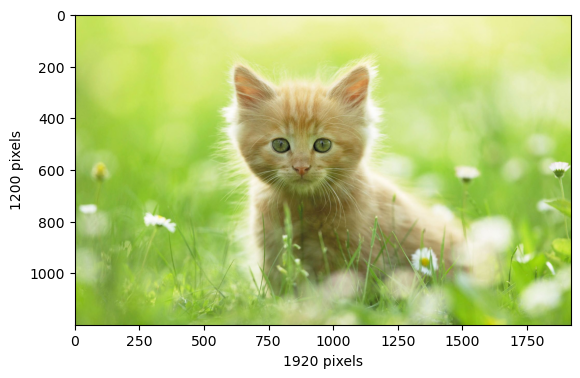

In [7]:
plt.ylabel(f'{image.shape[0]} pixels')
plt.xlabel(f'{image.shape[1]} pixels')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

### This line of code automatically reshapes all the images into 256 x 256 pixels

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_path)

Found 161 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
print(f'Type of the value : {type(batch)}')
print(f'Type of the inner value : {type(batch[0])}')
print(f'Length of batch : "{len(batch)}" ---> it contains image and label\n---> Zero for image and One for label')

Type of the value : <class 'tuple'>
Type of the inner value : <class 'numpy.ndarray'>
Length of batch : "2" ---> it contains image and label
---> Zero for image and One for label


In [12]:
print(f'Image representation : {batch[0].shape}')
print(f'Label representation : {batch[1]}')

Image representation : (32, 256, 256, 3)
Label representation : [0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1]


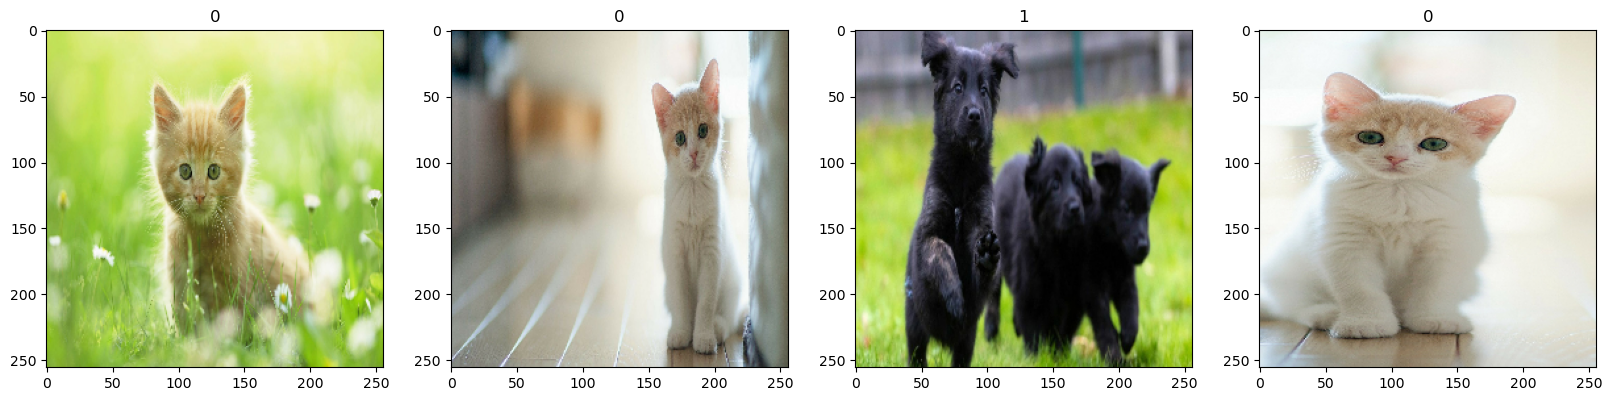

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

* so we can undestand that computer consider 0 as a cat picture and 1 as a dog pictue

In [14]:
# data = tf.keras.utils.image_dataset_from_directory(data_path)

scaled_data = data.map(lambda x, y: (x/255, y))

In [15]:
scaled_data.as_numpy_iterator()

In [16]:
batch_scaled_data = scaled_data.as_numpy_iterator().next()

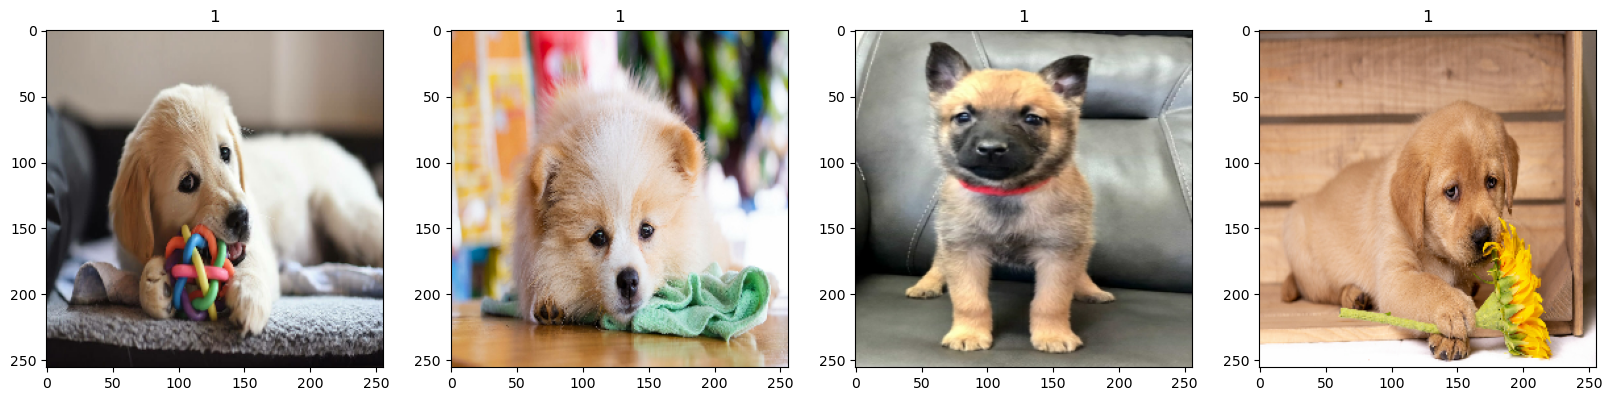

In [17]:
fix, ax = plt.subplots(ncols=4, figsize=(20, 20))
for i, img in enumerate(batch_scaled_data[0][:4]):
    ax[i].imshow(img.astype(float))
    ax[i].title.set_text(batch_scaled_data[1][i])

* we've made sure ourselves that the scaled data is working in a right way

# Split Data into Train and test set with rate of 0.8 and 0.2

In [18]:
print('Len Data =', len(scaled_data))
train_size = int(len(scaled_data)*0.8)
test_size = int(len(scaled_data)*0.2)+1
print('Train size =', train_size)
print('Test size =', test_size)

Len Data = 6
Train size = 4
Test size = 2


In [19]:
train = scaled_data.take(train_size)
test = scaled_data.skip(train_size).take(test_size)

## Using Deep Neural Network to Build a model (DNN)

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [24]:
# train = scaled_data.take(train_size)
# test = scaled_data.skip(train_size).take(test_size)

epoch = 20
hist = model.fit(train, epochs=epoch, validation_data=test)

Epoch 1/20
4/4 [==============================] - 3s 493ms/step - loss: 1.3378 - accuracy: 0.4688 - val_loss: 0.6861 - val_accuracy: 0.5758
Epoch 2/20
4/4 [==============================] - 2s 458ms/step - loss: 0.7010 - accuracy: 0.4766 - val_loss: 0.6745 - val_accuracy: 0.6061
Epoch 3/20
4/4 [==============================] - 2s 466ms/step - loss: 0.6863 - accuracy: 0.5781 - val_loss: 0.6773 - val_accuracy: 0.5152
Epoch 4/20
4/4 [==============================] - 2s 456ms/step - loss: 0.6898 - accuracy: 0.5156 - val_loss: 0.6730 - val_accuracy: 0.6061
Epoch 5/20
4/4 [==============================] - 2s 458ms/step - loss: 0.6841 - accuracy: 0.5625 - val_loss: 0.6423 - val_accuracy: 0.6667
Epoch 6/20
4/4 [==============================] - 2s 452ms/step - loss: 0.6424 - accuracy: 0.6875 - val_loss: 0.6795 - val_accuracy: 0.5455
Epoch 7/20
4/4 [==============================] - 2s 451ms/step - loss: 0.6292 - accuracy: 0.6875 - val_loss: 0.6308 - val_accuracy: 0.6667
Epoch 8/20
4/4 [====

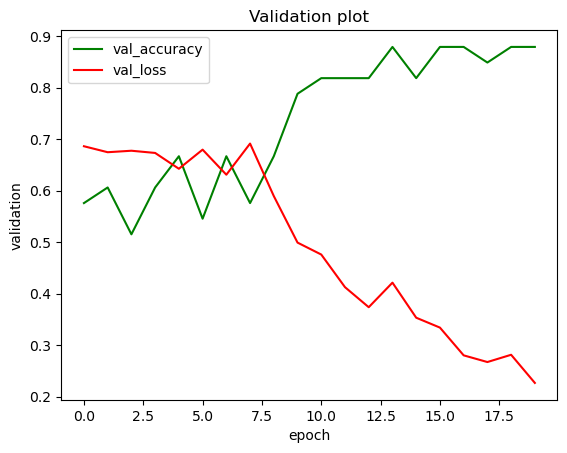

In [25]:
plt.figure()
plt.plot(hist.history['val_accuracy'], c='green', label='val_accuracy')
plt.plot(hist.history['val_loss'], c='red', label='val_loss')
plt.xlabel('epoch')
plt.ylabel('validation')
plt.title('Validation plot')
plt.legend(loc='upper left')
plt.show()

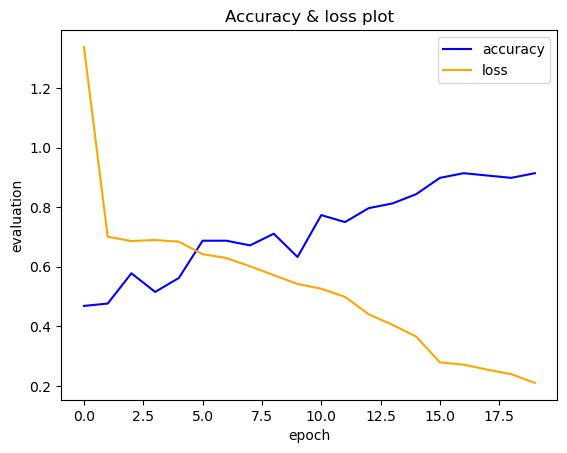

In [40]:
plt.figure()
plt.plot(hist.history['accuracy'], c='blue', label='accuracy')
plt.plot(hist.history['loss'], c='orange', label='loss')
plt.xlabel('epoch')
plt.ylabel('evaluation')
plt.title('Accuracy & loss plot')
plt.legend(loc='upper right')
plt.show()

In [27]:
# evaluate_img = cv.imread(os.path.join('Evaluate/cat.jpg'))
evaluate_img = cv.imread(os.path.join('Evaluate/dog.jpg'))

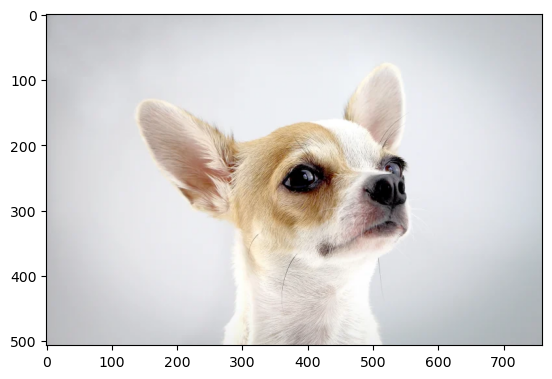

In [28]:
plt.imshow(cv.cvtColor(evaluate_img, cv.COLOR_BGR2RGB))
plt.show()

In [29]:
batch[0].shape

(32, 256, 256, 3)

In [30]:
evaluate_img.shape

(507, 760, 3)

### We have to reshape and resize the input image
* we have to expand the dimension

In [31]:
resize = tf.image.resize(evaluate_img, (256,256))

In [32]:
reshape = np.expand_dims(resize/255, 0)
test_img = reshape

In [33]:
print(reshape.shape)
print(batch[0].shape)

(1, 256, 256, 3)
(32, 256, 256, 3)


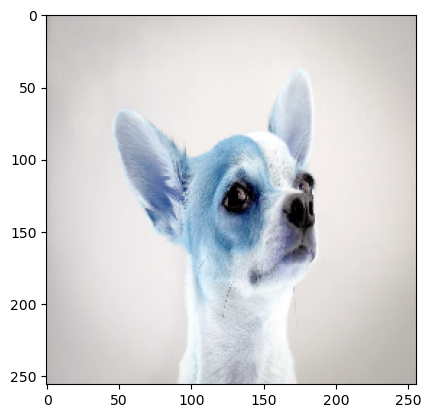

In [34]:
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
pred = model.predict(test_img)

1/1 [==============================] - 0s 63ms/step


In [36]:
pred[0][0]

0.90480757

In [37]:
if pred[0][0]<0.5:
    print("It's a kitty!")
else:
    print("It's a puppy!")

It's a puppy!


# Saving the model in a 'h5' format file

In [38]:
from tensorflow.keras.models import load_model

In [39]:
model.save(os.path.join('models', 'DogCatImageClassifier.h5'))

C:\Users\Sina\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
